# data visualization

### initalisation 

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
import mysql.connector
import seaborn as sns


import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/american-dream")

from src.d00_utils.mysql_utils import connect_to_mysql,save_to_mysql

db_connection = connect_to_mysql()

df_todisplay = pd.read_sql("cleaned_survey",con=db_connection)
df = df_todisplay.drop(columns=['index', 'level_0'])



## le salaire moyen, le salaire median, et représentez les dix déciles.

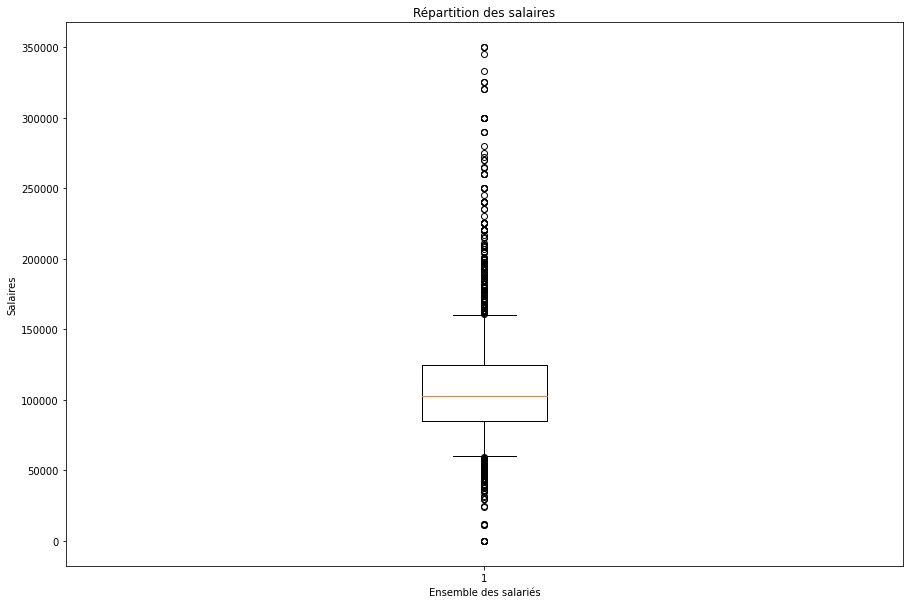

In [69]:
plt.figure(figsize = (15,10))
plt.xlabel("Ensemble des salariés")
plt.ylabel("Salaires")
plt.title("Répartition des salaires")

ax = plt.boxplot(df["SalaryUSD"], whis=[5,95],)

plt.show()

<AxesSubplot:title={'center':'Répartition des deciles'}, xlabel='Deciles', ylabel='Salaires'>

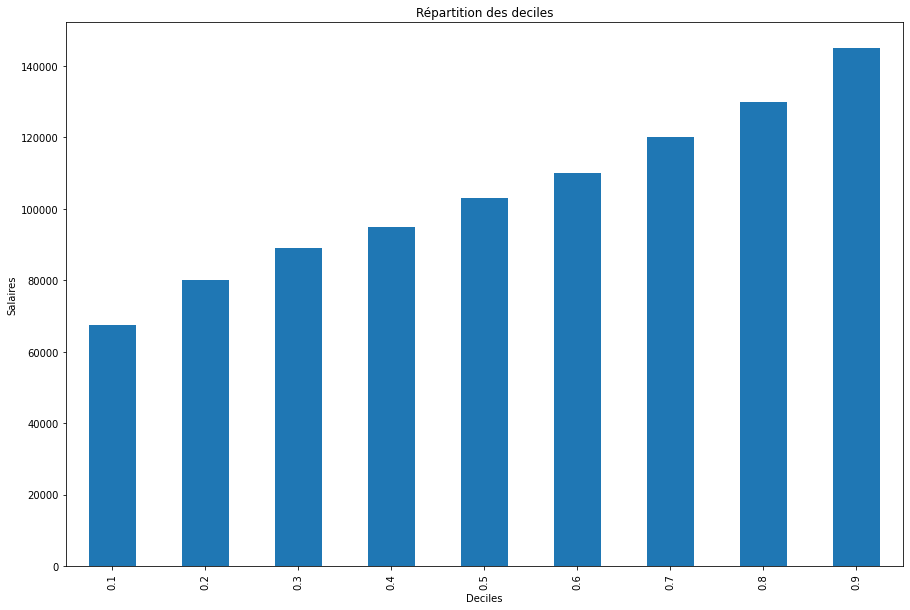

In [72]:
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize = (15,10))
plt.xlabel("Deciles")
plt.ylabel("Salaires")
df['SalaryUSD'].quantile(deciles).plot(kind='bar', title="Répartition des deciles")

## Le salaire moyen en fonction du job title 

Text(0, 0.5, 'salaire moyen')

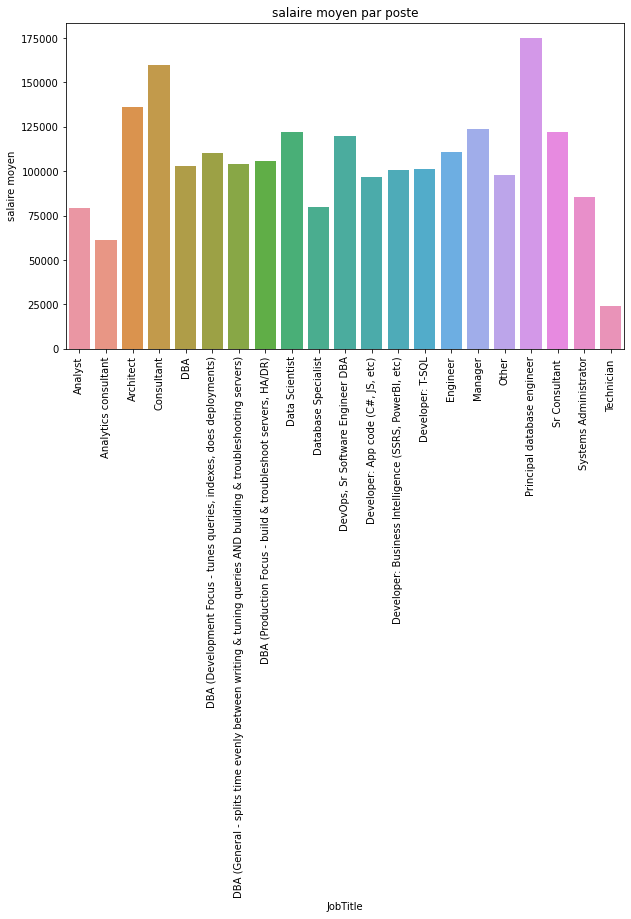

In [74]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Salaire moyen par poste")

# Bar chart showing average 
df_mean =df[['SalaryUSD','JobTitle']].groupby(['JobTitle'], as_index=False).mean()
sns.barplot(x=df_mean.JobTitle, y=df_mean.SalaryUSD)


# # Add label for vertical axis
plt.xticks(rotation=90)
plt.ylabel("salaire moyen")

## diagramme circulaire de la répartitions de ces jobtitles

<AxesSubplot:ylabel='JobTitle'>

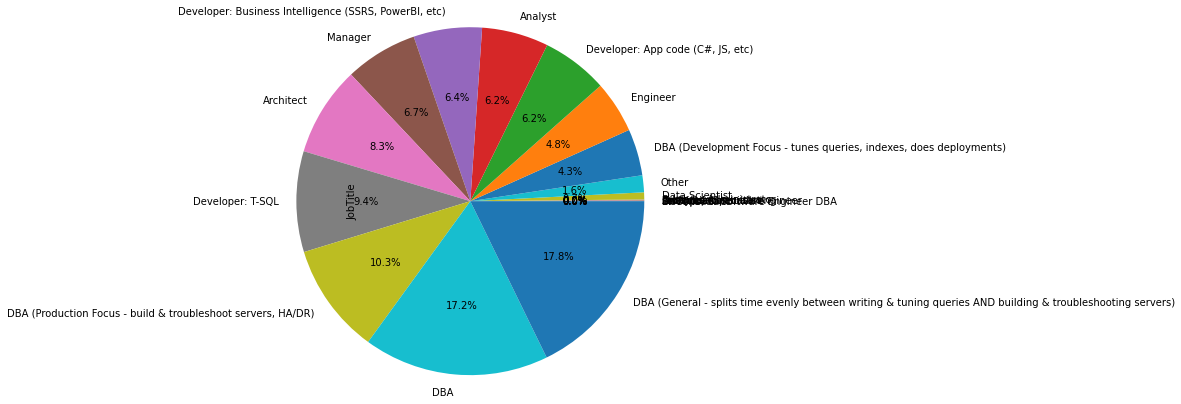

In [89]:
my_plot = df.groupby("JobTitle").JobTitle.count().sort_values()
my_plot.plot.pie(autopct="%.1f%%", radius=2)

##  Est-il préférable de travailler pour une seule ou plusieurs compagnies?

il faut voir si les personnes travaillant pour plusieurs compagnie on un plus gros salaire

In [65]:
print(df.columns)

Index(['SalaryUSD', 'Country', 'PostalCode', 'JobTitle',
       'YearsWithThisTypeOfJob', 'HowManyCompanies', 'OtherPeopleOnYourTeam',
       'HoursWorkedPerWeek', 'LookingForAnotherJob', 'CareerPlansThisYear',
       'Gender'],
      dtype='object')


##  Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?

todo: créer un df avec 2 col: "SalaryUSD" et "OtherPeopleOnYourTeam"
visualisation grace a un scatterplots et une ligne de regression pour constater ou non la corélation

##  Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

todo: créer un df avec 2 col: "SalaryUSD" et "YearsWithThisTypeOfJob"
visualisation grace a un scatterplots et une ligne de regression pour constater ou non la corélation

##  Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats Unis?

todo: création d'un graphique presentant 2 scatterplots ( 1 par sexe) ayant pour variable "SalaryUSD" et "JobTitle"
constater visuellement les ecart salariaux

##  Si cette inégalité salariale existe (suspense), est-elle due au fait que les femmes soient moins bien représentées dans les jobs les mieux payés ou que pour un travail identique elles sont en moyenne moins bien payées?

In [ ]:
todo: visualiser le salaire moyen de chaque job
    prendre les job dont le salaire est supérieur à la moyenne (mediane?) de ces salaires moyens
    visualiser le nombre de femme/homme pour chacun de ces jobs
    visualiser le salaire moyen des femmes/hommes pour chacun de ces jobs.

##  Y a t il une différence entre l'évolution salariale liées à l'expérience dans un même emploi entre les hommes et les femmes?
todo: existe-il une corélation entre "YearsWithThisTypeOfJob"+"SalaryUSD" selon qu'on est un homme ou une femme
 heatmap?

##   Résumé en quelques lignes votre plan de carrière pour conquérir le rêve américain.